In [1]:
import pandas as pd
import os
os.chdir("/Users/samyuktareddy/Desktop/MOF Gas absorption")

# Load base df_all (you may want to log it in rank_candidates.py or save it separately)
base = pd.read_csv("outputs/candidates/top_candidates.csv")  # optional: save it in rank_candidates.py
topk = pd.read_csv("outputs/candidates/topk_candidates.csv")

# Merge to compare
merged = topk.merge(base, on="refcode", suffixes=("_topk", "_base"))

# Check for mismatches
mismatches = (merged["screen_score_topk"] - merged["screen_score_base"]).abs() > 1e-5
print("Any mismatches?", mismatches.any())


Any mismatches? False


In [16]:
import pandas as pd

# Load the full dataframe saved from rank_candidates.py
df_all = pd.read_csv("outputs/candidates/top_candidates.csv")

# Now filter the MOF by refcode
evimut_row = df_all[df_all["refcode"] == "EVIMUT"]
print(evimut_row[["screen_score", "confidence", "pred_uptake_rf", "pred_uptake_gnn", "rationale"]])


      screen_score  confidence  pred_uptake_rf  pred_uptake_gnn  \
2674      1.649692       0.543        1.649692              NaN   

                        rationale  
2674  RF-only (no GNN prediction)  


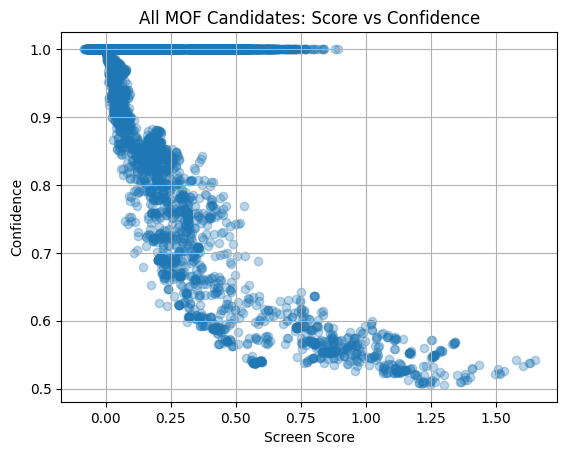

In [18]:
import matplotlib.pyplot as plt

df_all = pd.read_csv("outputs/candidates/top_candidates.csv")

plt.scatter(df_all["screen_score"], df_all["confidence"], alpha=0.3)
plt.xlabel("Screen Score")
plt.ylabel("Confidence")
plt.title("All MOF Candidates: Score vs Confidence")
plt.grid(True)
plt.show()
